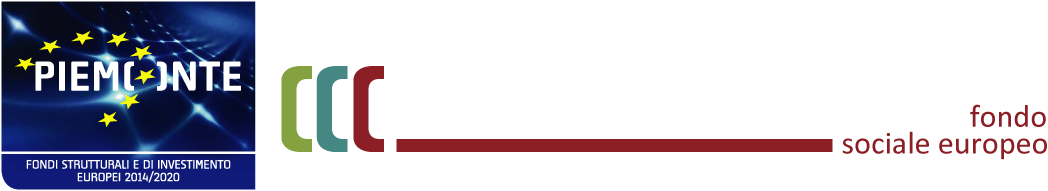





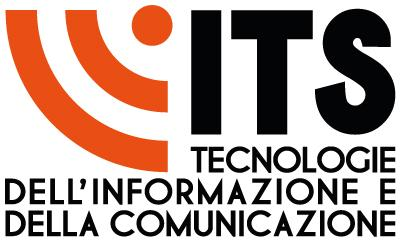




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


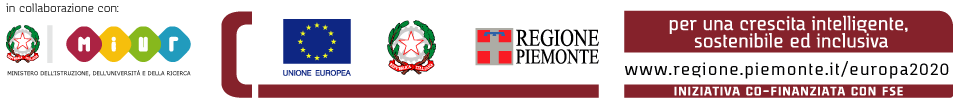



---



*NOME*: DARIO

\

COGNOME:OLIVO



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **QUALORA DUE O PIÙ PROVE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE, SARANNO TUTT VALUTATE CON IL VOTO MINIMO.**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```

\

* **I dati devono obbligatoriamente essere caricati dall' url fornito su questo documento. Il caricamento dal drive locale dello studente verrà valutato negativamente.**

\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**
- Raccolta dati medici sulle condizioni di salute e lo stile di vita legate alle malattie cardovascolari

\

**url:**
- https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv

\


**fonte:**

- https://www.kaggle.com/

\

**traduzione dati:**
* *age*: età espressa in giorni
* *sex*:
  1. donne
  2. uomini
* *height*: altezza espressa in cm
* *weight*: peso espresso in kg
* *ap_hi*: pressione massima
* *ap_lo*: pressione minima
* *cholesterol*:
  1. normale
  2. sopra il normale
  3. ben al di sopra del normale
* *gluc*:  
  1. normale,
  2. sopra il normale
  3. ben al di sopra del normale
* *smoke*:
  1. si
  2. no
* *alco*:
  1. si
  2. no
* *active* (attività fisica)
  1. si
  2. no
* *cardio* (persenza di malattie cardiovascolari)
  1. si
  2. no

  









---



# **RICHIESTA 1**

Setup del progetto.

- Importare le librerie necessarie allo svolgimento del progetto
- Oraganizzare e preparare i dati

In [1]:
#importo le librerie necessarie allo svolgimento compito
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importazione del dataset e converto eventuali NaN in 0
mdexam = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv', sep = ',' ,encoding = 'latin1').fillna(0)
#display(mdexam)

#creazione delle variabili che andrò ad utilizzare per svolgere le consegne
#tutte le colonne, tranne quella dell'id, rappresentano una variabile con all'interno un'array di dati del dataframe
sex=mdexam['sex']#rappresenta il sesso della persona
height=mdexam['height']#rappresenta altezza in cm
weight=mdexam['weight']#rappresenta peso persone espresso in chili
ap_hi=mdexam['ap_hi']#rappresenta pressioni massime
ap_lo=mdexam['ap_lo']#rappresenta pressioni minime
chol=mdexam['cholesterol']#raprresenta coloesterolo: 1Normale, 2 sopra il normale, 3 ben sopra il normale
gluc=mdexam['gluc']#rappresenta glucosio con i valori: 1normale, 2sopra al normale, 3 ben sopra il normale
smoke=mdexam['smoke']#rappresenta se i candidati fumano o no. 1 si , 0 no
alco=mdexam['alco']#rappresenta consumo alcol 1 si , 0 no
active=mdexam['active']# rappresenta attività fisica 1 si, 0 no
cardio=mdexam['cardio']#presenza di malattie cardiovascolari 1 si, 0 no

#l'età in questo dataframe è espressa in giorni per comodità e facilità di lettura dei dati preferisco convertirla in anni.
#utilizzo l' operatore // che dopo aver effettuato la divisione arrotonda il risultato al numero intero più vicino. Così avremo l'età in interi
#sostituisco nel dataset l'età calcolata in giorni con quella appena calcolata in anni
mdexam['age'] = mdexam['age']// 365
display(mdexam)
#adesso posso creare la variabile che contiene le età dei pazienti
age=mdexam['age']
#display(age)





,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


# **RICHIESTA 2**

- Può essere utile  modificare il DataFrame riordinandolo sulla base dei dati di una colonna?

- Verificare la presenza di valori nulli e decidere come trattarli.

- Verificare la persenza di *outlier* e decidere come trattarli.


In [2]:
#verifico la presenza di valori nulli nel dataframe
#per fare ciò utilizzo la funzione isnull() che verifica se nel mio dataset ho valori nulli
mdexam.isnull().sum()
#non abbiamo valori nulli poichè l'operazione restituisce 0 come valore per tute le colonne, ciò significa che non abbiamo valori nulli
#creo una copia di sicurezza del mio file sul quale andrò a lavorare per sicurezza.
cp_mdexam=mdexam.copy()
#display(cp_mdexam)

#verifico la presenza di outlier
#per curiosità ho ordinato i dataset in maniera seperata ascendente per i campi age, nel primo caso, ap_hi nel secondo, e ap_lo nel terzo
cp_mdexam1 = cp_mdexam.sort_values('age', ascending = True)
#display(cp_mdexam1)
cp_mdexam2 = cp_mdexam.sort_values('ap_hi', ascending = True)
#display(cp_mdexam2)#si possono già notare dei dati anomali come numeri negativi o numeri elevati come 14020
cp_mdexam3= cp_mdexam.sort_values('ap_lo', ascending = True)
#display(cp_mdexam3)#si possono già notare dei dati anomali come numeri negativi, dati con valore 0 oppure numeri elevati di 5 cifre
#ordinando la pressione sistolica e diastolica ho chiaramente notato dei valori fuori scala.
#consultando vari siti e tabelle  online ho deciso di ritenere come renge valido per la pressione sistolica 90-180
#vado a modificare i dati nel dataset
max_ap_hi=180
min_ap_hi=80
cp_mdexam =cp_mdexam[(cp_mdexam['ap_hi'] <= max_ap_hi) & (cp_mdexam['ap_hi'] >= min_ap_hi)]
#display(cp_mdexam)
#faccio la stessa cosa per la pressione distolica dove utilizzerò come range di validità 50-120
max_ap_lo=120
min_ap_lo=50
cp_mdexam =cp_mdexam[(cp_mdexam['ap_lo'] <= max_ap_lo) & (cp_mdexam['ap_lo'] >= min_ap_lo)]
#display(cp_mdexam)
cp_mdexam=cp_mdexam.dropna()
#display(cp_mdexam)
#creo altre copie e le ordino per psservare i dati estremi del dataframe. Sembra essere tutto a posto. eliminati gli outliers
cp_md1 = cp_mdexam.sort_values('ap_hi', ascending = True)
#display(cp_md1)
#anche qui ordino i dati per osservare presenza di outliers.
cp_md2 = cp_mdexam.sort_values('ap_lo', ascending = True)
#display(cp_md2)
#ordino per età per osservare se ci sono altri possibili outliers
cp_mdexam=cp_mdexam.sort_values('age', ascending = True)
#copio il dataset elaborato nel dataset principale così sono uguali e nel caso posso lavorare con entrambi.
mdexam=cp_mdexam
display(mdexam)



,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30666,43842,29,1,159,59.0,120,80,1,1,0,0,1,0
22343,31922,29,2,175,92.0,100,60,1,1,0,0,1,0
6219,8850,29,1,175,59.0,120,80,1,1,0,0,1,0
55905,79749,30,1,160,59.0,110,70,1,1,0,0,1,0
62910,89844,39,1,168,67.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53120,75774,64,1,162,89.0,130,80,1,1,0,0,1,1
22875,32676,64,1,162,99.0,180,100,3,1,0,0,1,1
61386,87647,64,2,168,81.0,170,120,3,3,0,0,1,1
53156,75823,64,1,158,90.0,140,90,3,3,0,0,1,1


# **RICHIESTA 3**

A partire dai dati sul fumo e sul consumo di alcol, atturare la seguenti analisi e visualizzare i risultati.
 * Quant'è la percentuale tra le donne
 * Quant'è la percentuale tra gli uomini
 * Quant'è la percenutale in totale



Percentuale uomini fumatori:  21.870539837125346
Percentuale donne fumatrici:  1.7775383786695396
Percentuali fumatori totale:  8.776265188846159
Percentuale consumatori di alcol uomini:  10.565863487532532
Percentuali donne consumatrici alcol:  2.511446269862645
Percentuale consumatori di alcol totale:  5.316644489610902


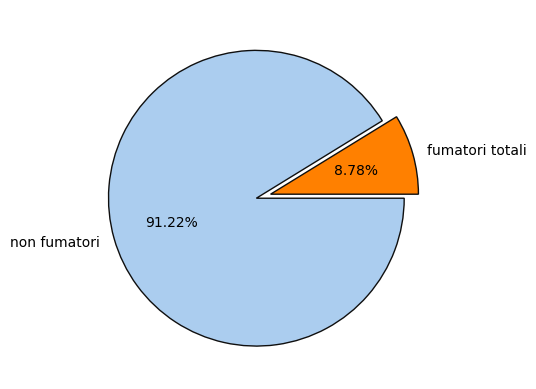

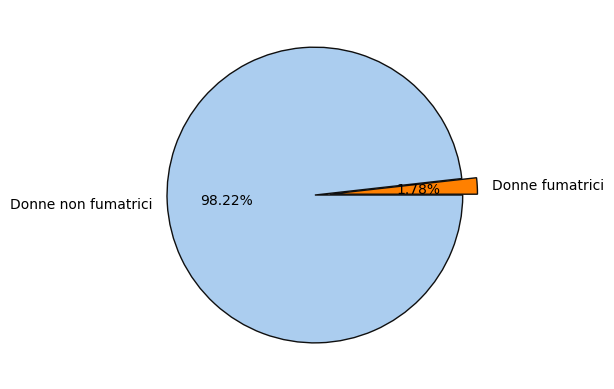

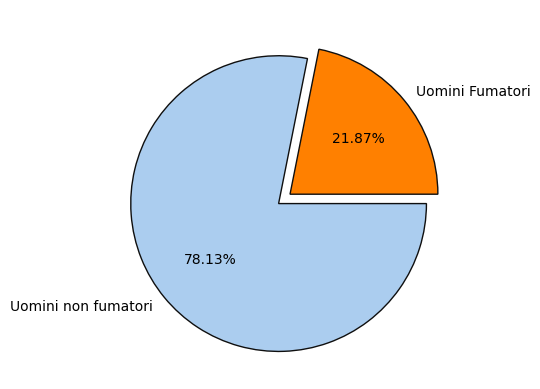

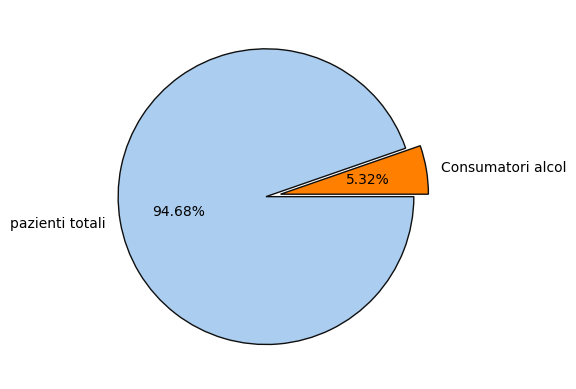

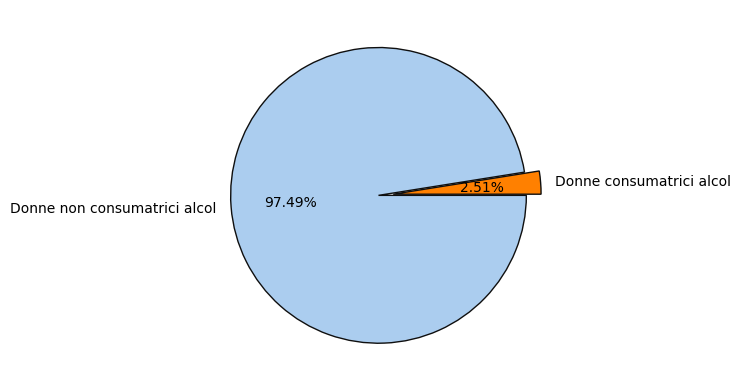

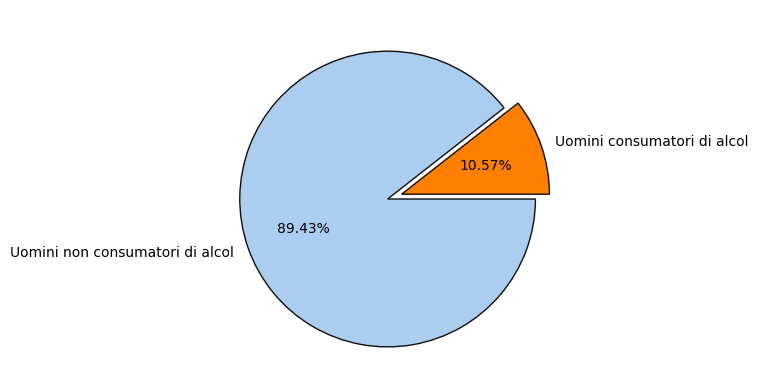

In [3]:
#Nella legenda iniziale i consumi di alcol e fumo sono entrambi indicati con il numero 1, mentre il non consumo di entambe le sostanze con il numero 2. Tuttavia nel dataframe il non consumo-
#-è indicato con il numero 0. perciò 1= consumo, 0= non consumo.
#vado a calcolare la percentuale di uomini e donne fumatori
#identifico e prendo i dati del dataset che fanno riferimento ai fumatori e li inserisco nella viabile fumatori
fumatori = cp_mdexam[cp_mdexam['smoke'] == 1]
fumatori_tot = fumatori.shape[0]
#.shape[0] restituisce il numero di righe del nuovo dataframe di fumatori.

#partendo dagli uomini:
#calcolo variabili con numero totale degli uomini  utile a calcolare in seguito le percentuali di uomini  fumatori
uomini_tot = cp_mdexam[cp_mdexam['sex'] == 2].shape[0]
#seleziono i dati dove fumatore == 2, ovvero dove il soggetto è un uomo
uomini_fumo = fumatori[fumatori['sex'] == 2].shape[0]
#calcolo percentuale fumatori uomini e la stampo
perc_uomini_fumo = (uomini_fumo / uomini_tot) * 100
print('Percentuale uomini fumatori: ',perc_uomini_fumo)

#adesso stessa cosa per le donne:
#calcolo variabili con numero totale delle donne utile a calcolare in seguito le percentuali di donne fumatrici
donne_tot = cp_mdexam[cp_mdexam['sex'] == 1].shape[0]
#seleziono i dati dove fumatore == 1, ovvero dove il soggetto è donna
donne_fumo = fumatori[fumatori['sex'] == 1].shape[0]
#calcolo percentuale fumatrici donne e la stampo
perc_donne_fumo = (donne_fumo / donne_tot) * 100
print('Percentuale donne fumatrici: ',perc_donne_fumo)

#salvo in una variabile il numero di pazienti totali
pazienti_tot=68389
#calcolo percentuale totale fumatori e la stampo
perc_fumatori_totale=(fumatori_tot/pazienti_tot)*100
print('Percentuali fumatori totale: ',perc_fumatori_totale)

#calcolo percentuali uomini e donne consumatori di alcol
#calcolo consumatori totali di alcol
bevitori= cp_mdexam[cp_mdexam['alco'] == 1]
bevitori_tot=bevitori.shape[0]
#display(bevitori_tot)

#uomini
# Calcolo la percentuale di uomini consumatori di alcol in relazione al totale dei pazienti uomini
#trovo valore consumatori di alcol uomini, identificati dal valore 2
tot_bevitori_uomini = bevitori[bevitori['sex'] == 2].shape[0]
#calcolo percentuale uomini che consumano alcol su pazienti uomini totali
perc_bevitori_uomini = (tot_bevitori_uomini / uomini_tot) * 100
print('Percentuale consumatori di alcol uomini: ',perc_bevitori_uomini)

#donne
# Calcolo la percentuale di donne consumatrici di alcol in relazione al totale dei pazienti uomini:
#trovo valore consumatrici alcol donne, identificate dal valore 1
tot_bevitori_donne= bevitori[bevitori['sex'] == 1].shape[0]
#calcolo percentuale donne che consumano alcol su pazienti donne totali
perc_bevitori_donne=(tot_bevitori_donne/donne_tot)*100
print('Percentuali donne consumatrici alcol: ',perc_bevitori_donne)

#calcolo percentuale consumatori di alcol totali
perc_bevitori_tot=(bevitori_tot/pazienti_tot)*100
print('Percentuale consumatori di alcol totale: ',perc_bevitori_tot)
#grafici.
#Utilizzerò grafici a torta perchè, secondo me, sono molto efficaci in questa situazione.
#grafico percentuali pazienti fumatori su pazienti totali
sezioni_fumatori_tot = np.array([perc_fumatori_totale, 100 - perc_fumatori_totale])
etichette_fumatori_tot = np.array(['fumatori totali', 'non fumatori'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_fumatori_tot,
        labels = etichette_fumatori_tot,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()

#grafico su donne fumatrici su donne totati
sezioni_fumatrici_donne=np.array([perc_donne_fumo, 100 - perc_donne_fumo])
etichette_fumatrici_donne=np.array(['Donne fumatrici', 'Donne non fumatrici'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}
plt.pie(sezioni_fumatrici_donne,
        labels = etichette_fumatrici_donne,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()

#grafico percentuali fumatori uomini
sezioni_fumatori_uomini=np.array([perc_uomini_fumo, 100 - perc_uomini_fumo])
etichette_fumatori_uomini=np.array(['Uomini Fumatori', 'Uomini non fumatori'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}
plt.pie(sezioni_fumatori_uomini,
        labels = etichette_fumatori_uomini,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()


#grafici relativi al consumo alcool
#grafico consumatori alcol su pazienti totali
sezioni_bevitori_tot = np.array([perc_bevitori_tot, 100 - perc_bevitori_tot])
etichette_bevitori_tot = np.array(['Consumatori alcol', 'pazienti totali'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_bevitori_tot,
        labels = etichette_bevitori_tot,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()

#grafico relativo consumo alcol da parte di donne su numero donne totali
sezioni_bevitrici= np.array([perc_bevitori_donne, 100 - perc_bevitori_donne])
etichette_bevitrici = np.array(['Donne consumatrici alcol', 'Donne non consumatrici alcol'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_bevitrici,
        labels = etichette_bevitrici,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()

#grafico relativo al consumo di alcol da parte degli uomini
sezioni_bevitori= np.array([perc_bevitori_uomini, 100 - perc_bevitori_uomini])
etichette_bevitori = np.array(['Uomini consumatori di alcol', 'Uomini non consumatori di alcol'])
colori = np.array(['#ff8000',"#abcdef",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_bevitori,
        labels = etichette_bevitori,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = False,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# **RICHIESTA 4**


La pressione arteriosa in un individuo si calcola mettendo a rapporto la pressione sistolica (massima) con la pressione diastolica (minima).

\begin{align}
  ap = {  {ap\_hi} \over {ap\_lo}}
\end{align}

* Calcolare la pressione per ogni individuo del dataset e aggiungere la nuova colonna dopo  ap_lo.

* Verificare che il processo non generi anomalie.



*N.B Da qui in poi per "pressione", si intndernno i volri riferiti alla nuova colonna "ap"*



In [4]:
#inserisco una colonna 'ap' dopo la colonna 'ap_lo'.
#i valori della colonna ap sono stati ricavati dalla formula ap_hi/ap_lo
#cp_mdexam.columns.get_loc('ap_lo') restituisce l’indice della colonna ‘ap_lo’ nel dataset.
#cp_mdexam.columns.get_loc('ap_lo') + 1 calcola l’indice dove inserire la nuova colonna, subito dopo la colonna ‘ap_lo’.
#cp_mdexam['ap_hi'] / cp_mdexam['ap_lo'] calcola i valori della nuova colonna come il risultato della divisione tra i valori delle colonne ‘ap_hi’ e ‘ap_lo’.
#infine, il metodo insert viene utilizzato per inserire la nuova colonna ‘ap’ nel dataset nella posizione calcolata, con i valori calcolati.
#
#
cp_mdexam.insert(cp_mdexam.columns.get_loc('ap_lo')+1, 'ap', cp_mdexam['ap_hi']/cp_mdexam['ap_lo'])
display(cp_mdexam)
#display(mdexam)

,id,age,sex,height,weight,ap_hi,ap_lo,ap,cholesterol,gluc,smoke,alco,active,cardio
30666,43842,29,1,159,59.0,120,80,1.500000,1,1,0,0,1,0
22343,31922,29,2,175,92.0,100,60,1.666667,1,1,0,0,1,0
6219,8850,29,1,175,59.0,120,80,1.500000,1,1,0,0,1,0
55905,79749,30,1,160,59.0,110,70,1.571429,1,1,0,0,1,0
62910,89844,39,1,168,67.0,120,80,1.500000,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53120,75774,64,1,162,89.0,130,80,1.625000,1,1,0,0,1,1
22875,32676,64,1,162,99.0,180,100,1.800000,3,1,0,0,1,1
61386,87647,64,2,168,81.0,170,120,1.416667,3,3,0,0,1,1
53156,75823,64,1,158,90.0,140,90,1.555556,3,3,0,0,1,1


# **RICHIESTA 5**

**5.1 media**
* Qual'è la pressione media tra i fumatori e i non fumatori?
* Qual'è la pressione media tra chi consuma e chi non cosuma alcol?

In [5]:
#calcolo della pressione media tra fumatori e non fumatori
#pressione media tra non fumatori
#come scritto prima, al contrario della legenda, considero il valore 0 come non fumatori poichè non è presente alcun valore 2
#per calcolare la media verrà utilizzato il metodo mean()
#come suggerito nella consegna precedente utilizzeremo la colonna 'ap' quando faremo riferimento alla pressione
#calcoliamo  la media dei valori nella colonna ‘ap’ per le righe in cui il valore della colonna ‘smoke’ è uguale a 0. Ovvero, calcolo la media dei valori di ‘ap’ per i non fumatori.
media_no_fumo=cp_mdexam[cp_mdexam['smoke']== 0]['ap'].mean()
print('Pressione media non fumatori: ',media_no_fumo)
#vado a effetuare lo stesso calcolo ma adesso prendendo in esame i fumatori, ovvero cerceremo i valori della colonna 'smoke' con valore 1. e poi calcoleremo la media utilizzando semrpe il metodo mean
media_fumatori=cp_mdexam[cp_mdexam['smoke']== 1]['ap'].mean()
print('Pressione media  fumatori: ',media_fumatori)

#seguendo lo stesso ragionamento vado a calcolare la pressione media tra chi consuma alcol e chi invece non col consuma
#anche qui, consumatori alcol=1 , non consumatori= 0
media_no_alcol=cp_mdexam[cp_mdexam['alco']== 0]['ap'].mean()
print('Pressione media non consumatori alcol: ',media_no_alcol)
#media pressione consumatori alcol
media_bevitori=cp_mdexam[cp_mdexam['alco']== 1]['ap'].mean()
print('Pressione media  consumatori alcol: ',media_bevitori)




Pressione media non fumatori:  1.5596224039841347
Pressione media  fumatori:  1.5628352539161587
Pressione media non consumatori alcol:  1.5598899951150347
Pressione media  consumatori alcol:  1.560160411902956


**5.2 varianza**
* Come varia la pressione nei i fumatori?
* Come varia la pressione nei i consumatori di alcol?


In [6]:
#utilizzando le dispense per calcolare la varianza utilizzeremo il metodo np.var() fornito da numpy
#chiudo nella variabile pressione_fumatori i valori delle pressioni dei fumatori sulla quale andrò poi a calcolare la varianza
pressione_fumatori =cp_mdexam[cp_mdexam['smoke'] == 1]['ap']
var_fumatori=np.var(pressione_fumatori)
print('Variazione pressione nei fumatori: ',var_fumatori)

#volendo si poteva eseguire tutte le operazioni prima della stampa su una sola riga anziche assegnarle ad una variabile per velocizzare il tutto
#es:
#var_fumatori = np.var(cp_mdexam[cp_mdexam['smoke'] == 1]['ap'])
#
#utilizzerò questo metodo nel calcolare la varianza dei consumatori di alcol
#seleziono i consumatori di alcol, ovvero che hanno valore 1, in relazione alla tabella 'ap', e poi calcolo varianza
var_bevitori=np.var(cp_mdexam[cp_mdexam['alco'] == 1]['ap'])
print('Variazione pressione nei consumatori alcol: ',var_bevitori)


Variazione pressione nei fumatori:  0.022280904913045584
Variazione pressione nei consumatori alcol:  0.022779601002096615


**5.3 deviazione standard**
* Com'*italicized text* è distribuito il dato della pressione nei fumatori
* Com' è distribuito il dato della pressione nei "bevitori"


deviazione standard fumatori:  0.14926789645816538
Variazione pressione nei consumatori alcol:  0.15092912575807432


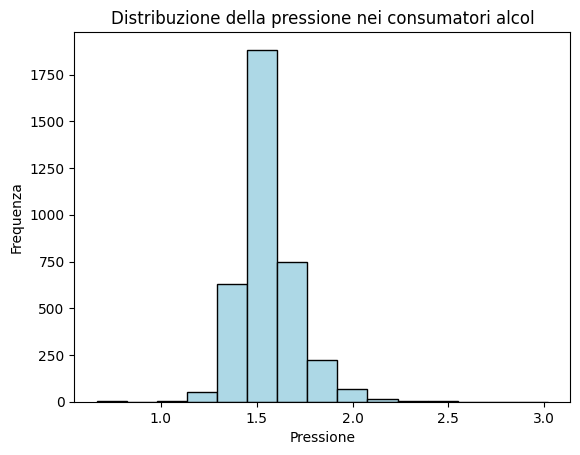

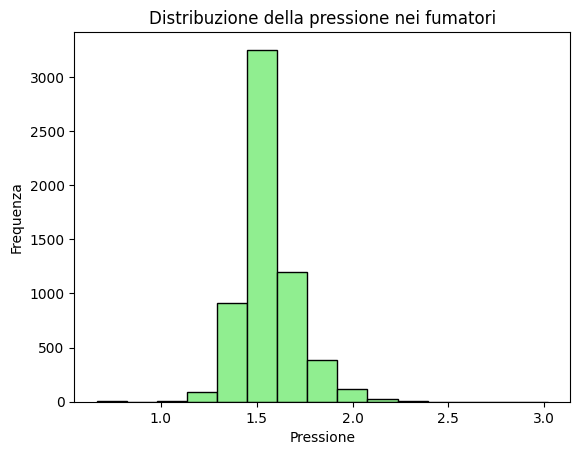

In [7]:
#calcolo la deviazione standard sia per i fumatori che per i consumatori di alcol
#per calcolare la deviazione standard utilizzero np.std sempre da numpy
#deviazione standard fumatori
#dentro pressione_fumatori inserisco array di dati dei pazienti fumatori identificati dal valore 1 nella colonna 'smoke'
pressione_fumatori =cp_mdexam[cp_mdexam['smoke'] == 1]['ap']
std_fumatori=np.std(pressione_fumatori)
print('deviazione standard fumatori: ', std_fumatori)
#deviazione standard consumatori alcol
#dentro pressione_bevitori inserisco dati dei pazienti consumatori di alcol identificati dal valore 1 nella colanna 'alco'
pressione_bevitori=cp_mdexam[cp_mdexam['alco'] == 1]['ap']
std_bevitori=np.std(pressione_bevitori)
print('Variazione pressione nei consumatori alcol: ',std_bevitori)

#creazione dei grafici
#grafico distribuzione pressione nei consumatori di alcol
plt.hist(data=cp_mdexam[cp_mdexam['alco'] == 1],x='ap', color='lightblue', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.title('Distribuzione della pressione nei consumatori alcol')
plt.show()
#distribuzione grafico pressione fumatori
plt.hist(data=cp_mdexam[cp_mdexam['smoke'] == 1],x='ap', color='lightgreen', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.title('Distribuzione della pressione nei fumatori')
plt.show()



**5.4 correlazione**
 * Rapportare la pressione dei fumatori e dei "bevitori.
 * Verificare il grado di correlazione
 * Visualizzare il risultato in una matrice di correlazione.


In [8]:
#richiamo le variabili pressioni fumatori e pressione bevitori
pressione_fumatori =cp_mdexam[cp_mdexam['smoke'] == 1]['ap']
pressione_bevitori=cp_mdexam[cp_mdexam['alco'] == 1]['ap']
#display(pressione_fumatori)
#display(pressione_bevitori)

#per poter calcolare correlazione i due array devono essere delle stessi dimensioni perciò andro a troncare il piu lungo che è pressione_fumatori
#l'array prex_fumatori viene creato prendendo i primi 3636 valori dell'array pressione_fumatori
prex_fumatori=pressione_fumatori[:3636]
#display(prex_fumatori)
#converto i  dati del dataset in un arrays attraverso il metodo .to_numpy()
prs_fumatori=prex_fumatori.to_numpy()
prs_bevitori=pressione_bevitori.to_numpy()
#definizione di correlazione
def correlazione(x: prs_fumatori, y: prs_bevitori) -> float:
  mu_x = np.mean(x)
  mu_y = np.mean(y)
  cov =  np.sum((x - mu_x) * (y - mu_y))
  return (cov / np.sqrt( np.sum(np.power(x - mu_x, 2)) * np.sum(np.power(y - mu_y, 2)) ))
#calcolo correlazione e matrice di correlazione
corr =  correlazione(prs_fumatori,prs_bevitori)
corr_matrix = np.corrcoef(prs_fumatori, prs_bevitori)

print("indice di correlazione: ", corr, "\n")
print("matrice di correlazione: \n", corr_matrix)





indice di correlazione:  0.00975496968371102 

matrice di correlazione: 
 [[1.         0.00975497]
 [0.00975497 1.        ]]


# **RICHIESTA 6**

* Visualizzare la distribuzione dei valori della pressione di fumatori e consumatori di alcol con le rispettive mededie.


* Visualizzare la distrubuzione dei valori della pressione di fumatori e cosumatori di alcol ed evidenziare i valori critici rispetto alla seguete tabella (ricordarsi di valutare il rapporto sistolica / diastolica).

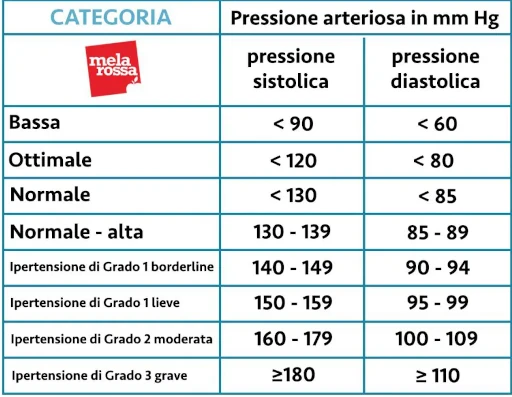

Pressione media  consumatori alcol:  1.560160411902956
Pressione media  fumatori:  1.5628352539161587


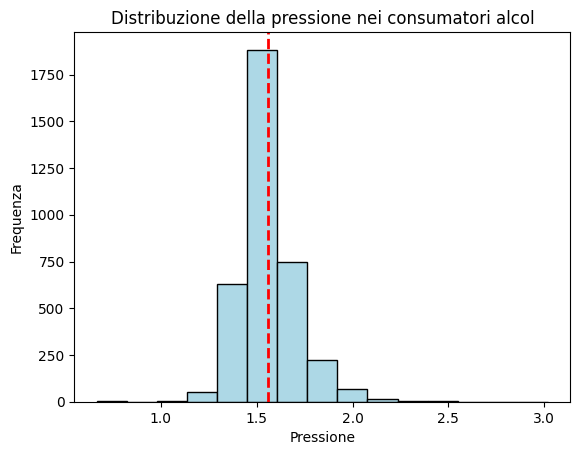

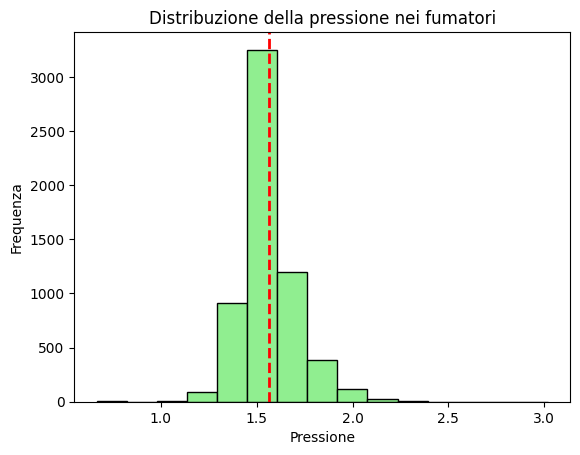

1.6363636363636365

1.6

1.5789473684210527

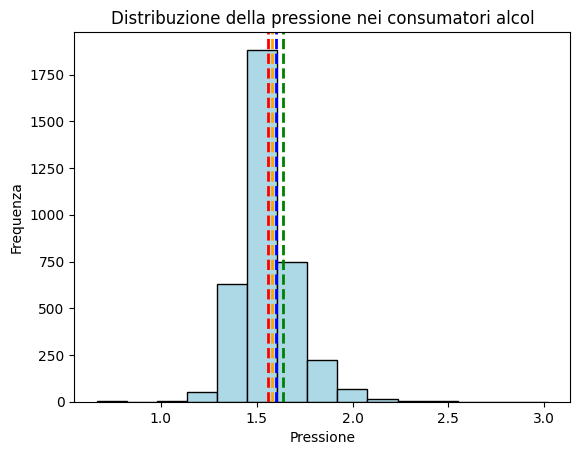

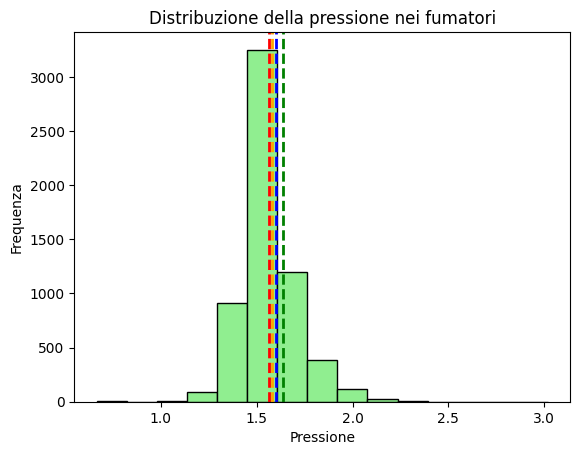

In [9]:
#richiamo le variabili con le medie calcolate dei fumatori e dei consumatori di alcol
#media pressione consumatori alcol
media_bevitori=cp_mdexam[cp_mdexam['alco']== 1]['ap'].mean()
print('Pressione media  consumatori alcol: ',media_bevitori)
#media fumatori
media_fumatori=cp_mdexam[cp_mdexam['smoke']== 1]['ap'].mean()
print('Pressione media  fumatori: ',media_fumatori)

#grafico distribuzione valori di pressione consumatori alcol con rispettiva media
plt.hist(data=cp_mdexam[cp_mdexam['alco'] == 1],x='ap', color='lightblue', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.axvline(media_bevitori, color='red', linestyle='dashed', linewidth=2) #aggiungo media_bevitori
plt.title('Distribuzione della pressione nei consumatori alcol')
plt.show()

#grafico distribuzione valori di pressione fumatori con rispettiva media
plt.hist(data=cp_mdexam[cp_mdexam['smoke'] == 1],x='ap', color='lightgreen', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.axvline(media_fumatori, color='red', linestyle='dashed', linewidth=2) #aggiungo media_fumatori
plt.title('Distribuzione della pressione nei fumatori')
plt.show()

#calcolo i valrori limit secondo i dati della tabella sopra facendo sistolica/diastolica dei valori critici massimi e minimi
#valore critico 1 si riferisce a ipertensione grado 3
critico_1=(180/110)
#valore critico 2 si rifersice a ipertensione grado 2
critico_2=(160/100)
#valore critico 3 si riferisce a ipertensione grado 1
critico_3=(150/95)

display(critico_1)
display(critico_2)
display(critico_3)

#grafico distribuzione valori di pressione consumatori alcol con rispettiva media
plt.hist(data=cp_mdexam[cp_mdexam['alco'] == 1],x='ap', color='lightblue', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.axvline(critico_1, color='green', linestyle='dashed', linewidth=2)#aggiungo valore critico_1
plt.axvline(critico_2, color='blue', linestyle='dashed', linewidth=2)#aggiungo valore critico_2
plt.axvline(media_bevitori, color='red', linestyle='dashed', linewidth=2) #aggiungo media_bevitori
plt.axvline(critico_3, color='orange', linestyle='dashed', linewidth=2)#aggiungo valore critico_3

plt.title('Distribuzione della pressione nei consumatori alcol')
plt.show()


#grafico distribuzione valori di pressione fumatori con rispettiva media e valori crititci rispetto a tabella
plt.hist(data=cp_mdexam[cp_mdexam['smoke'] == 1],x='ap', color='lightgreen', ec='black', bins=15)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.axvline(media_fumatori, color='red', linestyle='dashed', linewidth=2) #aggiungo media_fumatori
plt.axvline(critico_1, color='green', linestyle='dashed', linewidth=2)#aggiungo valore critico_1
plt.axvline(critico_2, color='blue', linestyle='dashed', linewidth=2)#aggiungo valore critico_2
plt.axvline(critico_3, color='orange', linestyle='dashed', linewidth=2)#aggiungo valore critico_3
plt.title('Distribuzione della pressione nei fumatori')
plt.show()


